In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_images(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (100, 100))  # Resize images to a fixed size
        images.append(img.flatten())  # Convert images to 1D arrays
        labels.append(label)
    return images, labels

In [3]:
cats_images, cats_labels = load_images(r"C:\Users\CHERVITH\Downloads\test\cats", 0)  
dogs_images, dogs_labels = load_images(r"C:\Users\CHERVITH\Downloads\test\dogs", 1) 
X = np.array(cats_images + dogs_images)
y = np.array(cats_labels + dogs_labels)

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear')  # Linear kernel is used for simplicity, you can experiment with other kernels
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [5]:
# Evaluate the model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5714285714285714


In [6]:
#Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

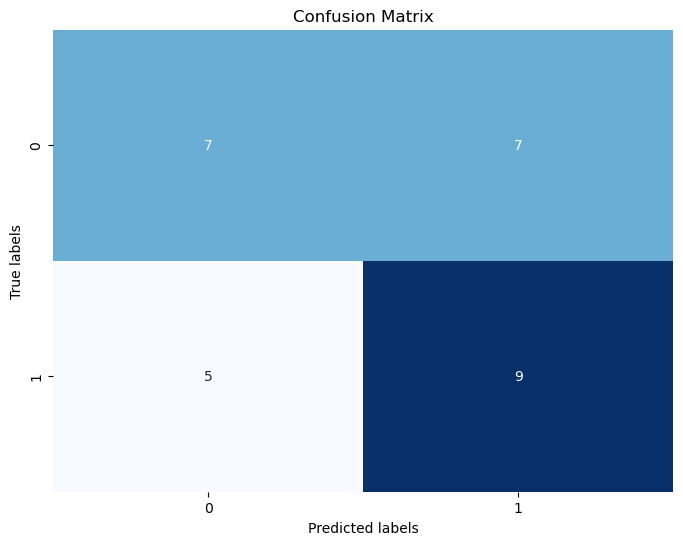

In [7]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [8]:
# Create classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.50      0.54        14
           1       0.56      0.64      0.60        14

    accuracy                           0.57        28
   macro avg       0.57      0.57      0.57        28
weighted avg       0.57      0.57      0.57        28

